# Importing the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns = {'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'}, inplace = True)
df.drop('CustomerID', axis = 1, inplace = True)

In [5]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Visualization

## Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

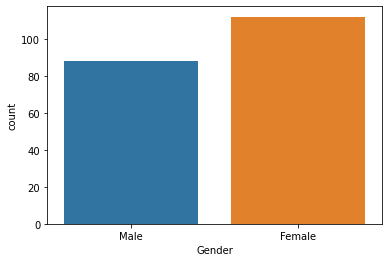

In [6]:
sns.countplot(x = 'Gender', data = df)

<AxesSubplot:xlabel='Count', ylabel='Age'>

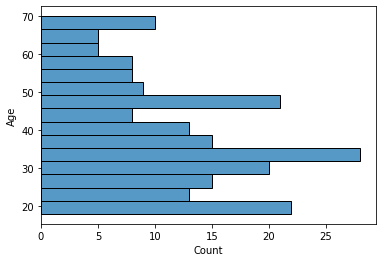

In [7]:
sns.histplot(y = 'Age', data = df, bins = 15)

## Bi-Variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Annual Income'>

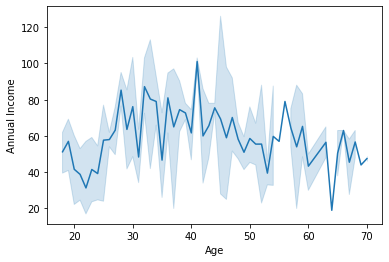

In [8]:
sns.lineplot(x = 'Age', y = 'Annual Income', data = df)

<AxesSubplot:xlabel='Age', ylabel='Spending Score'>

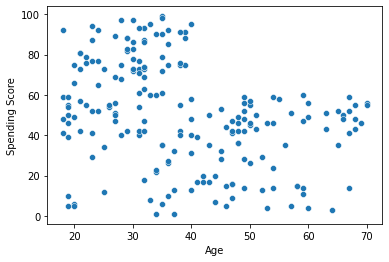

In [9]:
sns.scatterplot(x = 'Age', y ='Spending Score', data = df)

# Multi-Variate Analysis

<AxesSubplot:>

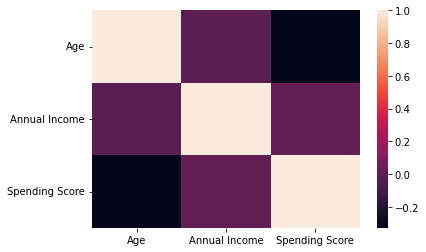

In [10]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Age', ylabel='Spending Score'>

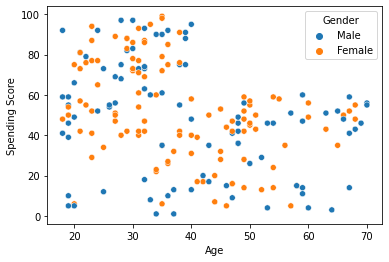

In [11]:
sns.scatterplot(x = 'Age', y ='Spending Score', hue = 'Gender', data = df)

# Descriptive Statistics

In [12]:
df.describe(include = 'all')

,Gender,Age,Annual Income,Spending Score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [13]:
df.mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1344\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Age               38.85
Annual Income     60.56
Spending Score    50.20
dtype: float64

In [14]:
df.median()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1344\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Age               36.0
Annual Income     61.5
Spending Score    50.0
dtype: float64

In [15]:
df.mode().head(1)

,Gender,Age,Annual Income,Spending Score
0,Female,32.0,54,42.0


In [16]:
df.std()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1344\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Age               13.969007
Annual Income     26.264721
Spending Score    25.823522
dtype: float64

In [17]:
df.var()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1344\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Age               195.133166
Annual Income     689.835578
Spending Score    666.854271
dtype: float64

# Handling Missing Values
### There aren't any missing values

In [18]:
df.isnull().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

# Finding outliers

<AxesSubplot:>

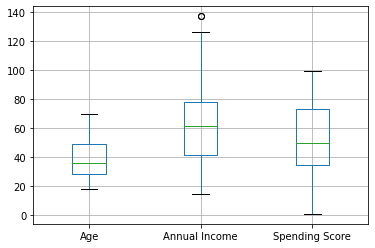

In [19]:
df.boxplot()

## Outlier is present only in the Annual Income column
#### Number of outliers were two data points , so we discard it

In [20]:
df = df.drop(df[df['Annual Income'] > 127].index)

In [21]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<AxesSubplot:>

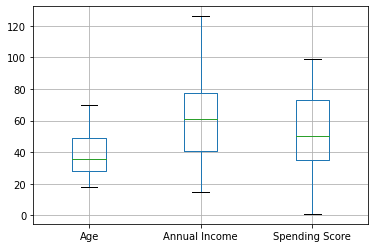

In [22]:
df.boxplot()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          198 non-null    object
 1   Age             198 non-null    int64 
 2   Annual Income   198 non-null    int64 
 3   Spending Score  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


# Checking for categorical variables

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
df['Gender'] = le.fit_transform(df['Gender'])

In [27]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Scaling the data

In [28]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [29]:
df_scaled = mms.fit_transform(df)

In [30]:
df_scaled

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918],
       [0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.        , 0.09615385, 0.02702703, 0.94897959],
       [1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.        , 0.32692308, 0.03603604, 1.        ],
       [0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [1.        , 0.36538462, 0.04504505, 0.12244898],
       [1.        , 0.07692308, 0.04504505, 0.79591837],
       [0.        , 0.32692308, 0.05405405, 0.34693878],
       [1.        , 0.03846154,

In [31]:
df_scaled.shape

(198, 4)

# Performing clustering

In [32]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
cluster = km.fit_predict(df_scaled)

In [33]:
cluster

array([3, 3, 4, 1, 1, 1, 4, 1, 0, 1, 0, 1, 4, 1, 2, 3, 4, 3, 0, 1, 3, 3,
       4, 3, 4, 3, 4, 3, 4, 1, 0, 1, 0, 3, 4, 1, 4, 1, 4, 1, 4, 3, 0, 1,
       4, 1, 4, 1, 1, 1, 4, 3, 1, 0, 4, 0, 4, 0, 1, 0, 0, 3, 4, 4, 0, 3,
       4, 4, 3, 1, 0, 4, 4, 4, 0, 3, 4, 3, 1, 4, 0, 3, 0, 4, 1, 0, 4, 1,
       1, 4, 4, 3, 0, 4, 1, 3, 4, 1, 0, 3, 1, 4, 0, 3, 0, 1, 4, 0, 0, 0,
       0, 1, 4, 3, 1, 1, 4, 4, 4, 4, 3, 4, 1, 3, 1, 1, 2, 3, 0, 3, 2, 3,
       1, 1, 2, 1, 4, 3, 2, 1, 4, 3, 1, 1, 2, 3, 2, 1, 4, 3, 2, 3, 4, 1,
       4, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 4, 3, 2, 3, 2, 3, 4, 1,
       2, 3, 2, 3, 4, 1, 2, 1, 4, 3, 4, 3, 4, 1, 4, 1, 2, 1, 4, 1, 4, 3])

In [34]:
np.unique(cluster)

array([0, 1, 2, 3, 4])

In [35]:
cluster.shape

(198,)

# Adding cluster data with primary data

In [36]:
names = df.columns

In [37]:
new_df = pd.DataFrame(df_scaled, columns = names)

In [38]:
new_df.head()

,Gender,Age,Annual Income,Spending Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [39]:
new_df['clus'] = pd.Series(cluster)

In [40]:
new_df.head()

,Gender,Age,Annual Income,Spending Score,clus
0,1.0,0.019231,0.000000,0.387755,3
1,1.0,0.057692,0.000000,0.816327,3
2,0.0,0.038462,0.009009,0.051020,4
3,0.0,0.096154,0.009009,0.775510,1
4,0.0,0.250000,0.018018,0.397959,1


# Splitting data into dependent and independent variables

In [41]:
# X is independent variable and y is dependent
X = new_df.iloc[:,:4]
y = new_df.iloc[:,4:]

In [42]:
X.shape

(198, 4)

In [43]:
y.shape

(198, 1)

# Splitting into training and testing datasets

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [45]:
X_train.shape

(148, 4)

In [46]:
y_train.shape

(148, 1)

In [47]:
X_test.shape

(50, 4)

In [48]:
y_test.shape

(50, 1)

# Building the model

In [49]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')

# Train the model

In [50]:
svm.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

# Test the model

In [51]:
pred_test = svm.predict(X_test)

In [52]:
pred_test

array([1, 4, 4, 4, 3, 2, 3, 1, 1, 1, 0, 0, 1, 1, 1, 4, 1, 1, 0, 1, 3, 4,
       4, 4, 1, 4, 4, 4, 3, 3, 1, 2, 0, 1, 4, 1, 4, 2, 1, 4, 0, 4, 4, 0,
       3, 1, 4, 1, 1, 3])

In [53]:
y_test.head()

,clus
175,1
40,4
34,4
90,4
145,3


# Evaluation Metrics

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(pred_test,y_test)

0.98

In [55]:
confusion_matrix(pred_test,y_test)

array([[ 5,  0,  1,  0,  0],
       [ 0, 18,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 0,  0,  0,  0, 16]], dtype=int64)